## PCA (Part 1)

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2018 Winter Term 1

Mike Gelbart

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import plotly.graph_objs as go # conda install plotly

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Create a synthetic data set

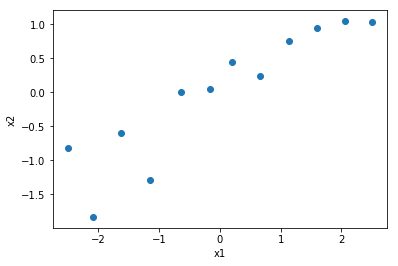

In [2]:
n = 12
d = 2

x1 = np.linspace(0,5,n)  + np.random.randn(n)*0.05
x2 = x1*0.7 + np.random.randn(n)*0.5
x1 = x1-np.mean(x1)
x2 = x2-np.mean(x2)

X = np.concatenate((x1[:,None],x2[:,None]),axis=1)

plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2');

Run PCA with k=1

In [3]:
k = 1
pca = PCA(n_components=k)
pca.fit(X);

### Visualizing PCA

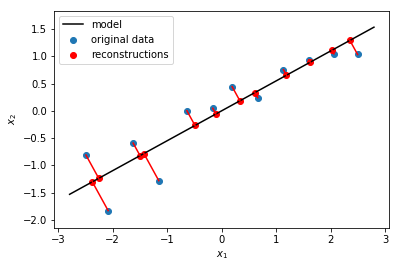

In [4]:
def make_plot(pca, X):
    W = pca.components_
    Z = pca.transform(X)

    # visualize the subspace spanned by W
    grid = np.linspace(min(X[:,0])-.3,max(X[:,0])+.3,1000)
    gridplot = (grid-pca.mean_[0])/W[0,0]*W[0,1]+pca.mean_[1]

    # visualize the reconstructions
    Xhat = pca.inverse_transform(Z)
    # xhat = Z@W + pca.mean_ # the same

    plt.scatter(X[:,0],X[:,1], label="original data")
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$');
    plt.plot(grid, gridplot, 'black', label="model")
    plt.scatter(Xhat[:,0],Xhat[:,1], c='red', label="reconstructions")
    plt.axis('equal');
    
    for i in range (X.shape[0]):
        plt.plot((X[i,0],Xhat[i,0]),(X[i,1],Xhat[i,1]), 'red')
    
    plt.legend()
    
make_plot(pca, X)

The line gives us a new, 1D coordinate system.

#### Moving to $d=3,k=2$

In [5]:
n = 12
d = 3

x1 = np.linspace(0,5,n)  + np.random.randn(n)*0.05
x2 = -x1*0.1 + np.random.randn(n)*2
x3 = x1*0.7 + np.random.randn(n)*3

X = np.concatenate((x1[:,None],x2[:,None],x3[:,None]),axis=1)
X = X - np.mean(X,axis=0)


Let's look at the points.

In [6]:
trace = go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode='markers')
layout = go.Layout(showlegend=False, scene=dict(xaxis={'title':'x1'},yaxis={'title':'x2'},zaxis={'title':'x3'}))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Let's look at what PCA gives us

In [7]:
# fit PCA
pca = PCA(n_components=2)
pca.fit(X)

# get grid for visualizing plane
z1 = np.linspace(-7,7,100)
z2 = np.linspace(-7,7,100)
z1grid, z2grid = np.meshgrid(z1, z2)
Zgrid = np.concatenate((z1grid.flatten()[:,None],z2grid.flatten()[:,None]),axis=1)
Xgrid = pca.inverse_transform(Zgrid)
Xgrid_re = np.reshape(Xgrid, (100,100,3))

# get reconstructions of original points
Z = pca.transform(X)
Xhat = pca.inverse_transform(Z)

traces1 = []
for i in range(n):
    traces1.append(go.Scatter3d(x=(X[i,0],Xhat[i,0]), 
                                y=(X[i,1],Xhat[i,1]), 
                                z=(X[i,2],Xhat[i,2]), 
                                marker = dict(color = 'blue')))

trace2 = go.Surface(x=Xgrid_re[:,:,0], y=Xgrid_re[:,:,1], z=Xgrid_re[:,:,2], 
                    showscale=False, colorscale=[[0, 'rgb(200,300,200)'], [1,'rgb(200,300,200)']], 
opacity=0.9)

trace3 = go.Scatter3d(x=Xhat[:,0], y=Xhat[:,1], z=Xhat[:,2], mode='markers')

data =  traces1 + [trace2, trace3]

layout = go.Layout(showlegend=False, scene=dict(xaxis={'title':'x1'},yaxis={'title':'x2'},zaxis={'title':'x3'}))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

We can also make a scatter plot of these $Z$-values:

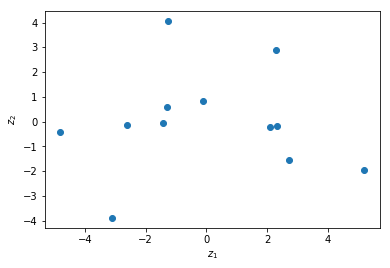

In [8]:
plt.scatter(Z[:,0],Z[:,1])
plt.xlabel('$z_1$')
plt.ylabel('$z_2$');

Above: this is projecting and rotating the data.

$d=3,k=1$

In [9]:
n = 12
d = 3

x1 = np.linspace(0,5,n)  + np.random.randn(n)*0.05
x2 = -x1*0.1 + np.random.randn(n)*2
x3 = x1*0.7 + np.random.randn(n)*1.5

X = np.concatenate((x1[:,None],x2[:,None],x3[:,None]),axis=1)
X = X - np.mean(X,axis=0)

# fit PCA
pca = PCA(n_components=1)
pca.fit(X)

# get grid for visualizing plane
Zgrid = np.linspace(-7,7,100)[:,None]
Xgrid = pca.inverse_transform(Zgrid)

# get reconstructions of original points
Xhat = pca.inverse_transform(pca.transform(X))

traces1 = []
for i in range(n):
    traces1.append(go.Scatter3d(x=(X[i,0],Xhat[i,0]), 
                                y=(X[i,1],Xhat[i,1]), 
                                z=(X[i,2],Xhat[i,2]), 
                                marker={'color':'blue'}))

trace2 = go.Scatter3d(x=Xgrid[:,0], y=Xgrid[:,1], z=Xgrid[:,2], mode='lines', marker={'color':'black'})

trace3 = go.Scatter3d(x=Xhat[:,0], y=Xhat[:,1], z=Xhat[:,2], mode='markers')

data =  traces1 + [trace2, trace3]

layout = go.Layout(showlegend=False, scene=dict(xaxis={'title':'x1'},yaxis={'title':'x2'},zaxis={'title':'x3'}))


fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Inspecting the values

In [10]:
k = 1
pca = PCA(n_components=k)
pca.fit(X);

In [11]:
X

array([[-2.389882  , -0.13181507, -2.54849843],
       [-2.06623509,  0.34832239, -1.38922578],
       [-1.57885504, -0.75576155,  0.08605792],
       [-1.1851452 ,  2.46594988, -2.48785273],
       [-0.71913339, -2.99126552,  0.12413192],
       [-0.20840334,  2.56735115, -2.9150204 ],
       [ 0.18782157,  0.63105207,  1.34149713],
       [ 0.67890772,  0.5514805 , -1.96905728],
       [ 1.08886799, -0.02639081,  1.27881405],
       [ 1.69035368, -4.03826812,  3.96564546],
       [ 2.07084696, -0.09959945,  0.62272586],
       [ 2.43085612,  1.47894453,  3.89078227]])

In [12]:
Z = pca.transform(X)
Z

array([[-2.97434458],
       [-2.12030541],
       [-0.25957327],
       [-3.55022087],
       [ 1.09572244],
       [-3.5302958 ],
       [ 0.87809539],
       [-1.53224516],
       [ 1.48673679],
       [ 5.62307957],
       [ 1.40127646],
       [ 3.48207443]])

In [13]:
W = pca.components_
W

array([[ 0.41525255, -0.43293673,  0.80008194]])

In [14]:
X.size

36

In [15]:
Z.size+W.size

15

We sometimes call this "compression" because we've reduced the number of values we're storing ($15<36$).

In [16]:
Xhat = pca.inverse_transform(Z)
Xhat

array([[-1.23510418,  1.28770301, -2.37971938],
       [-0.88046223,  0.91795808, -1.69641806],
       [-0.10778846,  0.1123788 , -0.20767988],
       [-1.47423828,  1.537021  , -2.84046759],
       [ 0.45500154, -0.47437848,  0.87666773],
       [-1.46596434,  1.52839471, -2.8245259 ],
       [ 0.36463135, -0.38015975,  0.70254826],
       [-0.63626872,  0.6633652 , -1.22592168],
       [ 0.61737125, -0.64366296,  1.18951125],
       [ 2.33499815, -2.43443766,  4.4989244 ],
       [ 0.58188363, -0.60666404,  1.12113599],
       [ 1.4459403 , -1.50751791,  2.78594486]])

### Why you need to center the data

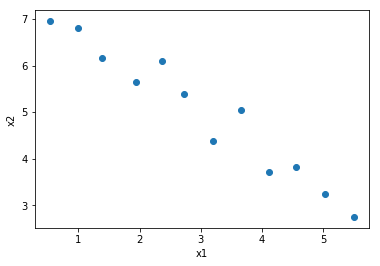

In [30]:
n = 12
d = 2

x1 = np.linspace(0,5,n)  + np.random.randn(n)*0.05
x2 = x1*(-0.7) + np.random.randn(n)*0.5
x1 = x1-np.mean(x1) + 3
x2 = x2-np.mean(x2) + 5

X = np.concatenate((x1[:,None],x2[:,None]),axis=1)

plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2');

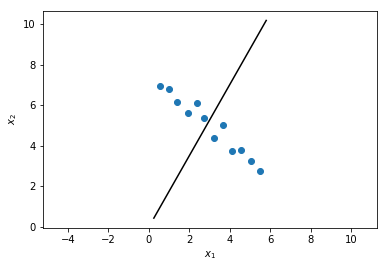

In [31]:
# mu=np.mean(X,axis=0)
# X -= mu

U,s,Vh = np.linalg.svd(X)
W = Vh[:k]

Z = X@W.T

# visualize the subspace spanned by W
grid = np.linspace(min(X[:,0])-.3,max(X[:,0])+.3,1000)
gridplot = (grid-pca.mean_[0])/W[0,0]*W[0,1]+pca.mean_[1]

# visualize the reconstructions
Xhat = Z@W
# xhat = Z@W + pca.mean_ # the same

plt.scatter(X[:,0],X[:,1], label="original data")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');
plt.plot(grid, gridplot, 'black', label="model")
plt.axis('equal');

In [32]:
mu = np.mean(X,axis=0)
X_centred = X - mu

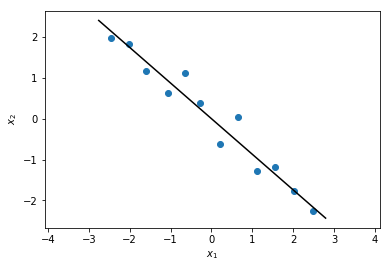

In [37]:
U,s,Vh = np.linalg.svd(X_centred)
W = Vh[:k]
Z = X_centred@W.T
Xhat = Z@W

grid = np.linspace(min(X_centred[:,0])-.3,max(X_centred[:,0])+.3,1000)
gridplot = (grid-pca.mean_[0])/W[0,0]*W[0,1]

plt.scatter(X_centred[:,0],X_centred[:,1], label="original data")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');
plt.plot(grid, gridplot, 'black', label="model")
plt.axis('equal');

Above: with centering, things look much better.